# Gradient Boosting

### Boston Housing data

In [1]:
# Gradient Boosting Algorithm
# Boston Housing Data
# Trainer: Bhabani Shankear Basak
# Python 

# Regression Problem

# Importing the libraries

import os
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.model_selection import KFold

from sklearn.ensemble import GradientBoostingRegressor # For Regression problem

import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams

In [2]:
os.chdir('D:/MLP_Session_26_JULY/DATASET')

data = pd.read_csv('Boston_Housing_data.csv')

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# Checking the Missing values

data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
data.shape

(506, 14)

In [6]:
# Creating separate dataset for Independent and Dependent variables

X = data.iloc[:,:-1]  # Independent variables
Y = data.iloc[:,-1]   # Depenedent variable

In [7]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [8]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [9]:
# Splitting the dataset into Train and Test

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [10]:
X_train.shape

(404, 13)

In [11]:
X_test.shape

(102, 13)

In [12]:
Y_train.shape

(404,)

In [13]:
Y_test.shape

(102,)

In [14]:
# Creating the GradientBoostingRegressor object with default settings

gb_reg = GradientBoostingRegressor(random_state=0)

In [15]:
gb_reg.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [16]:
# Fitting the model on the training data

model = gb_reg.fit(X_train,Y_train)

In [17]:
model.score(X_train,Y_train)  # 98% accuracy on training data

0.9798792300731834

In [18]:
Y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import r2_score

r2_score(Y_pred, Y_test)     # 54% accuracy on test data

0.5415958365930633

In [20]:
# Boosting tries to minimize the error as much as possible

# Calculating the feature importance

feature_imp = model.feature_importances_
feature_imp

array([2.31661387e-02, 4.54722930e-04, 6.35498888e-03, 4.57367122e-04,
       5.35931717e-02, 2.31842905e-01, 2.88421096e-02, 3.72229295e-02,
       4.37980226e-03, 1.49392252e-02, 6.98797900e-02, 1.19611359e-02,
       5.16905713e-01])

In [21]:
# Arranging the feature importance relative to the max importance

feature_imp = 100.0 * (feature_imp/feature_imp.max())
feature_imp

array([4.48169523e+00, 8.79701885e-02, 1.22942903e+00, 8.84817308e-02,
       1.03680749e+01, 4.48520686e+01, 5.57976221e+00, 7.20110622e+00,
       8.47311637e-01, 2.89012577e+00, 1.35188659e+01, 2.31398796e+00,
       1.00000000e+02])

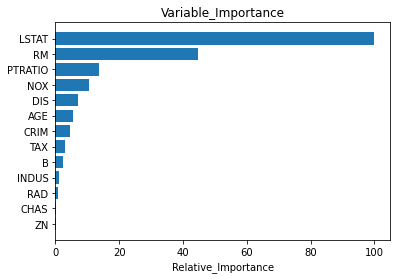

In [22]:
# Plotting the feature importance

import matplotlib.pyplot as plt

sorted_indices = np.argsort(feature_imp)
pos = np.arange(sorted_indices.shape[0]) + 0.5
plt.barh(pos, feature_imp[sorted_indices], align='center')
plt.yticks(pos,X.columns[sorted_indices])
plt.xlabel('Relative_Importance')
plt.title('Variable_Importance')
plt.rcParams['figure.figsize'] = [5,5]
plt.show()

In [23]:
# Hyperparameter tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV

hyper_params = {'learning_rate':[0.2,0.15,0.1,0.05],
               'n_estimators':[100,150,200,250]
               }

In [24]:
cv_tuning = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid = hyper_params, cv=10)

In [25]:
# Fitting the training data using the hyperparameters

cv_tuning.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.2, 0.15, 0.1, 0.05],
                         'n_estimators': [100, 150, 200, 250]})

In [26]:
cv_tuning.best_params_

{'learning_rate': 0.1, 'n_estimators': 150}

In [29]:
cv_tuning.best_score_

0.8705047266140931

In [27]:
# Fitting the new model using the optimal hyperparameters

best_model = GradientBoostingRegressor(learning_rate= 0.1, n_estimators= 150, random_state=0)

best_model.fit(X_train, Y_train)

GradientBoostingRegressor(n_estimators=150, random_state=0)

In [28]:
# Accuracy for the training data using optimal hyperparameters

best_model.score(X_train, Y_train)

0.9890680236947347

In [29]:
# Calculating the predicted value of Y using optimal hyperparameters

Y_pred_new = best_model.predict(X_test)

In [31]:
# Accuracy for the test data using optimal hyperparameters

from sklearn.metrics import r2_score

r2_score(Y_test, Y_pred_new)

0.7381205489748807

In [32]:
# So after using GridSearchCV, we find an increase in accuracy from 0.5415 to 0.7381